# Hypothesis testing
Elements of Data Science

## Hypothesis Testing Learning Goals
Develop and test an hypothesis
- Hypothesis
    - testable hypothesis
    - statistic
- Simulation: Sample the distribution
    - Repeat and collect outcomes
    - Iteration: 
        `for i in np.arange(samples)`
- Examine resulting distribution of outcomes
    - Probability distribution
    - Uncertainty
- p-test

In [24]:
import numpy as np
from datascience import *

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## A digression -- python formatting

You know Python has a few formatting rules. Indentation is critical for defining structure in loops, functions, and conditional statements, for example. Beyond that, you can pretty much do as you like. The following formatting conventions, however, will make your code more readable.

Black is a Python tool for checking formatting. You can actually install and run it to check your code, or you can simply paste some code you have written into the [Black Playground](https://black.vercel.app) to see the suggested format.

In [26]:
# First Example: Paste into the playground. Note: the code will run as written

a=2
b=3
c=a+b
print( c)

5


In [27]:
# Paste the foratted code below:
# First Example: Paste into the playground. Note: the code will run as written


a = 2
b = 3
c = a + b
print(c)


5


In [28]:
# Second example: Again, the code as written will run without error. But long lines are hard to read.
# Create a list
CST_departments = ['Earth & Environmental Science','Biology','Chemistry','Physics','Computer & Information Sciences','Mathematics']

# Now loop over each element and print it.
for dept in CST_departments:
    print(dept)

Earth & Environmental Science
Biology
Chemistry
Physics
Computer & Information Sciences
Mathematics


In [29]:
# Paste the foratted code below:



In [30]:
# Formatting complex statements
from datascience import *
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'
full_census_table = Table.read_table(data)
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table = partial_census_table.relabeled('SEX', 'GENDER').relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020')
partial_census_table.show(3)

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025


In [31]:
# Paste the foratted code below:



Black makes some opinionated choices. You do not have to follow all of its formatting suggestions, but you should pick a consistant way to format your code and Black uses what many pythonistas consider to be best practice.

## End of digression...

## Olympics Review

In [32]:
datafile = "/home/jovyan/datascience/Spring 2024/Mini Project I/Olympic_Data/winter_athletes.csv"
athletes = Table.read_table(datafile).sort("Year",descending=True).where("Season","Winter")
age_athletes = athletes.where("Age",are.below(99)).where("Age",are.above(0))

5. What are the top ten countries in number of Gold, silver, bronze medals, and total medals? You should have four sets of top ten countries for each of the scenarios. Generate the **five number summary** for each medal type for all countries.
Hint: `.where("Medal",are.not_equal_to("nan"))` to get only medal winners. Consider how to create a column for the sum of the three medal categories.

In [33]:
medals = athletes.where("Medal", are.not_equal_to("nan")).select("Team", "Medal").pivot("Medal", "Team")
medals.show(5)

Team,Bronze,Gold,Silver
Australia,7,6,3
Austria,97,67,80
Austria-1,4,12,16
Austria-2,2,0,2
Belarus,5,6,4


In [34]:
total_medals = medals.column("Gold") + medals.column("Silver") + medals.column("Bronze")
medals = medals.with_column("Total Medals", total_medals)
medals.show(5)

Team,Bronze,Gold,Silver,Total Medals
Australia,7,6,3,16
Austria,97,67,80,244
Austria-1,4,12,16,32
Austria-2,2,0,2,4
Belarus,5,6,4,15


In [35]:
# Top ten gold
medals.sort("Gold", descending=True).select("Team", "Gold").take(np.arange(10))

Team,Gold
Canada,289
Soviet Union,228
Norway,151
United States,141
Sweden,125
Germany,115
Russia,72
Austria,67
Finland,66
South Korea,50


7. Which sports (top 5) awarded the most medals in Lake Placid, New York (1980,
https://www.lakeplacid.com/do/activities/olympic-sites ).

In [36]:
# Sports that awarded the most medals in 1980
medals_sport = athletes.where("Medal", are.not_equal_to("nan"))
medals_sport.where("Year", 1980).group("Sport").sort("count", descending=True).take(np.arange(5))

Sport,count
Ice Hockey,59
Cross Country Skiing,38
Speed Skating,28
Alpine Skiing,18
Biathlon,18


12. Plot the yearly trend in number of sports. Think of a strategy to code this. What is the trend? 

In [37]:
athletes.group(["Year", "Event"]).group("Year")

Year,count
1924,17
1928,14
1932,14
1936,17
1948,22
1952,22
1956,24
1960,27
1964,34
1968,35


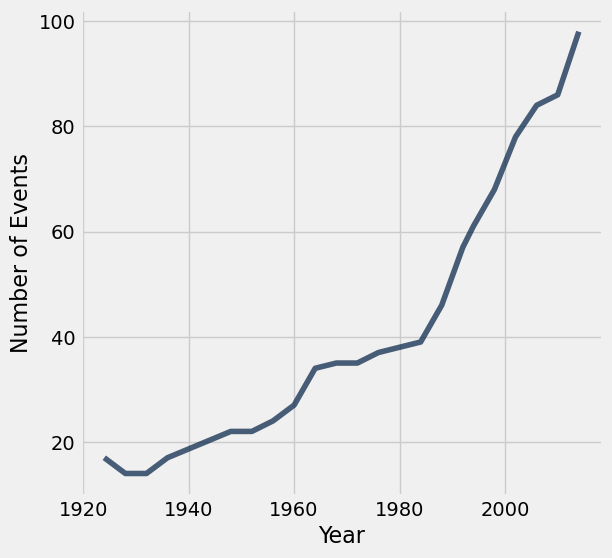

In [38]:
athletes.group(["Year", "Event"]).group("Year").relabel("count", "Number of Events").plot("Year", "Number of Events")

13. Plot an overlay of gold, silver, and bronze medals as a function of year on the same plot excluding hockey. What is the trend? Are the medals awarded at a similar rate?

In [39]:
medals_per_year = athletes.where("Event", are.not_containing("Hockey")).pivot("Medal", "Year").drop("nan")
medals_per_year.show(3)

Year,Bronze,Gold,Silver
1924,27,46,29
1928,19,18,16
1932,18,18,18


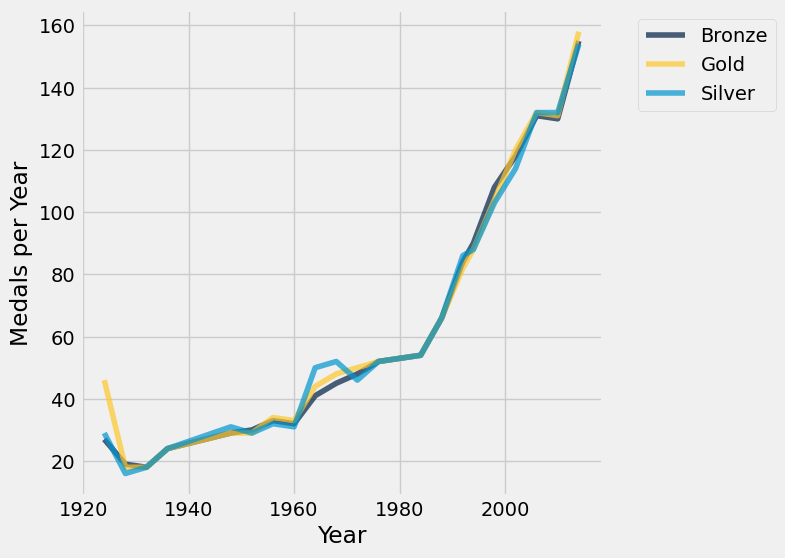

In [40]:
medals_per_year.drop("Total Medals").plot("Year")
ax = plt.gca()
ax.set_ylabel("Medals per Year");

## LAB 06 TIPS

In [41]:
modifier = 11
num_observations = 7

def simulate_observations(modifier, num_observations):
    """Produces an array of 7 simulated modified die rolls"""
    ...

observations = ...
observations

Ellipsis

In [42]:
# How to make an empty array and append values
test = make_array()
np.append(test, 5)
test

array([], dtype=float64)

# Back to Groundhogs
![](https://i.natgeofe.com/n/fb6f0b10-50e0-4857-9246-012bbef02614/groundhog.jpg?w=1200)

## Hypothesis Testing

#### Ground Hog


In [43]:
groundhogdata = Table.read_table('../../Lab05/GroundHogData/summarizedGroundhogData_20210326.csv')
groundhogdata

hogID,year,shadowPres,dateSample,julDay,GDD,cGDD,numObs,meanJulSpringDay,sdJulSpringDay,seJulSpringDay,earlyOrLate
BC,2018,yes,2018-04-11,101,3.05556,127.222,30,85.8667,12.4367,2.27062,late
BC,2019,no,2019-04-06,96,8.33333,123.889,30,85.8667,12.4367,2.27062,late
BECK,2006,yes,2006-02-15,46,7.22222,127.006,30,72.4333,14.6586,2.67628,early
BECK,2007,no,2007-03-14,73,14.1667,129.167,30,72.4333,14.6586,2.67628,late
BECK,2008,no,2008-03-17,77,0.833333,128.611,30,72.4333,14.6586,2.67628,late
BECK,2009,yes,2009-03-10,69,12.2222,130,30,72.4333,14.6586,2.67628,early
BECK,2010,no,2010-03-21,80,7.22222,129.444,30,72.4333,14.6586,2.67628,late
BECK,2011,no,2011-03-20,79,7.77778,133.611,30,72.4333,14.6586,2.67628,late
BECK,2012,no,2012-03-07,67,13.3333,129.444,30,72.4333,14.6586,2.67628,early
BECK,2013,no,2013-03-30,89,3.88889,128.611,30,72.4333,14.6586,2.67628,late


In [44]:
yes_late = groundhogdata.where('shadowPres', 'yes').where('earlyOrLate', 'late')
no_early = groundhogdata.where('shadowPres', 'no').where('earlyOrLate', 'early')

correct_tbl = yes_late.append(no_early)

In [45]:
num_correct = correct_tbl.num_rows / groundhogdata.num_rows * 100
print(f"The groundhogs were correct {num_correct:0.1f} percent of the time.")

The groundhogs were correct 51.1 percent of the time.


## Is 51.1% is correct "significantly" better than random guessing?

To answer this question we need to simulate guessing randomly 520 times (the size of our data set) and see what fractionof the time we do this much better than 50-50 by guessing.

In [46]:
shadow_options = make_array('yes', 'no')
spring_options = make_array('late', 'early')
num_observations = groundhogdata.num_rows
num_simulations = 1500
num_observations

530

In [47]:
# Simulate by guessing -- this is a single trial.

right = 0 
wrong = 0

for obs in range(num_observations):
    shadow = np.random.choice(shadow_options)
    spring = np.random.choice(spring_options)
    
    if shadow == 'yes' and spring == 'late':
        right += 1
    elif shadow == 'no' and spring == 'early':
        right += 1
    else:
        wrong += 1

simulated_num_correct = right / num_simulations
simulated_num_correct

0.182

In [48]:
# Create a function so we can generate many trials.
def sim_ground(repeats):
    correct_obs = []
    for i in np.arange(repeats):
        right = 0 
        wrong = 0
        for obs in range(num_observations):
            shadow = np.random.choice(shadow_options)
            spring = np.random.choice(spring_options)
            if shadow == 'yes' and spring == 'late':
                right += 1
            elif shadow == 'no' and spring == 'early':
                right += 1
            else:
                wrong += 1
        simulated_num_correct = right / num_observations
        correct_obs.append(simulated_num_correct)
    return correct_obs        

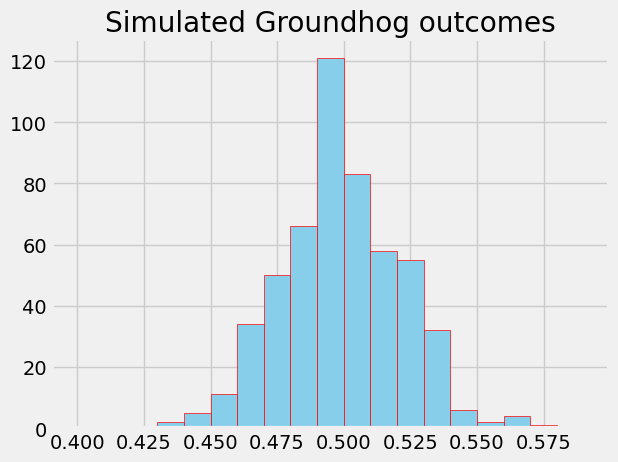

In [49]:
# Plot the histogram of 1500 trials
plt.hist(sim_ground(num_observations),bins=np.arange(0.4,0.6,.01),color = "skyblue", ec="red")
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground.png')
plt.show()

In [50]:
hogsimdata = Table().with_columns("Correct",sim_ground(num_simulations))
hogsimdata

Correct
0.513208
0.503774
0.5
0.496226
0.464151
0.498113
0.483019
0.503774
0.5
0.473585


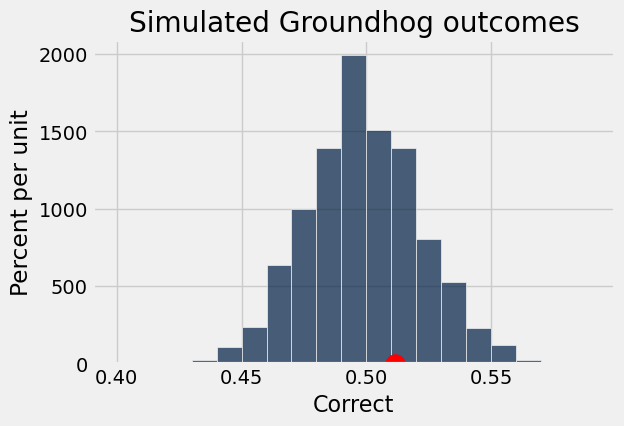

In [51]:
# The red dot shows the groundhog prediction accuracy
hogsimdata.hist(0,bins=np.arange(0.4,0.6,.01))
plt.scatter(num_correct/100, 0, color='red', s=200);
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground_correct.png')
plt.show()

In [52]:
# What is the probabilty of doing better than the groundhogs with random guessing?
np.count_nonzero(hogsimdata.column('Correct') >= num_correct/100) / num_simulations

0.30933333333333335

#### Essex Ed

In [53]:
groundhogdata.where('hogID',"EE")

hogID,year,shadowPres,dateSample,julDay,GDD,cGDD,numObs,meanJulSpringDay,sdJulSpringDay,seJulSpringDay,earlyOrLate
EE,2011,yes,2011-03-05,64,11.9444,135.556,30,50.8333,15.7329,2.87241,late
EE,2012,no,2012-02-01,32,12.7778,131.111,30,50.8333,15.7329,2.87241,early
EE,2013,no,2013-02-15,46,6.94444,129.167,30,50.8333,15.7329,2.87241,early
EE,2014,yes,2014-03-15,74,10.8333,133.611,30,50.8333,15.7329,2.87241,late
EE,2015,yes,2015-03-27,86,6.38889,130.278,30,50.8333,15.7329,2.87241,late
EE,2016,yes,2016-02-21,52,8.33333,131.667,30,50.8333,15.7329,2.87241,late
EE,2017,yes,2017-02-01,32,3.88889,129.722,30,50.8333,15.7329,2.87241,early
EE,2018,no,2018-02-16,47,8.61111,134.167,30,50.8333,15.7329,2.87241,early
EE,2019,no,2019-02-22,53,4.72222,131.667,30,50.8333,15.7329,2.87241,late


In [54]:
correct_tbl.where('hogID',"EE").sort('year')

hogID,year,shadowPres,dateSample,julDay,GDD,cGDD,numObs,meanJulSpringDay,sdJulSpringDay,seJulSpringDay,earlyOrLate
EE,2011,yes,2011-03-05,64,11.9444,135.556,30,50.8333,15.7329,2.87241,late
EE,2012,no,2012-02-01,32,12.7778,131.111,30,50.8333,15.7329,2.87241,early
EE,2013,no,2013-02-15,46,6.94444,129.167,30,50.8333,15.7329,2.87241,early
EE,2014,yes,2014-03-15,74,10.8333,133.611,30,50.8333,15.7329,2.87241,late
EE,2015,yes,2015-03-27,86,6.38889,130.278,30,50.8333,15.7329,2.87241,late
EE,2016,yes,2016-02-21,52,8.33333,131.667,30,50.8333,15.7329,2.87241,late
EE,2018,no,2018-02-16,47,8.61111,134.167,30,50.8333,15.7329,2.87241,early


In [55]:
num_correct = correct_tbl.where('hogID',"EE").num_rows / groundhogdata.where('hogID',"EE").num_rows * 100
num_correct

77.77777777777779

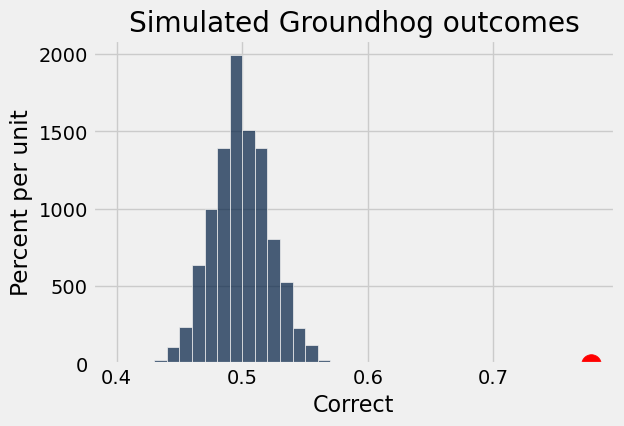

In [56]:
hogsimdata.hist(0,bins=np.arange(0.4,0.6,.01))
plt.scatter(num_correct/100, 0, color='red', s=200);
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground_correct.png')
plt.show()

In [57]:
np.count_nonzero(hogsimdata.column('Correct') >= num_correct/100) / num_simulations

0.0

In [58]:
num_observations = 7
hogsimdata = Table().with_columns("Correct",sim_ground(num_simulations))
hogsimdata

Correct
0.857143
0.571429
0.142857
0.714286
0.285714
0.857143
0.428571
0.571429
0.428571
0.428571


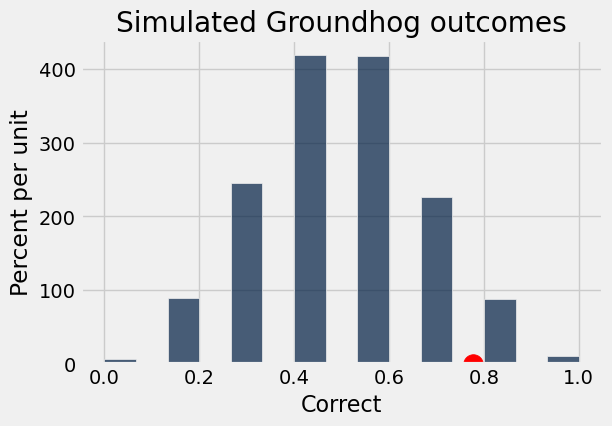

In [59]:
#hogsimdata.hist(0,bins=np.arange(0.1,0.9,.01))
hogsimdata.hist(bins=15)
plt.scatter(num_correct/100, 0, color='red', s=200);
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground_correct.png')
plt.show()

# Acknowledgement in the paper
This study was the result of a truly laboratory-driven effort that started over speculation on a Friday at the campus pub and has led to a cumulative effort of students in the Community Ecology and Energetics Laboratory at Lakehead University over several years. 